DATA ANALYSIS AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [21]:
books = pd.read_csv('/content/books.csv.zip')
ratings = pd.read_csv('/content/ratings.csv.zip')
book_tags = pd.read_csv('/content/book_tags.csv.zip')
tags = pd.read_csv('/content/tags.csv')

In [19]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [24]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [23]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [25]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [20]:
books.shape

(10000, 23)

In [26]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [27]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

CLEANING DATA

In [28]:
!pip install Goodreads

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Goodreads: filename=goodreads-0.3.2-py3-none-any.whl size=13101 sha256=c3224f724eb9d4ac4d6468452506f99d4aaa351f1c06d04c803c44b89d0f94ab
  Stored in directory: /root/.cache/pip/wheels/18/77/37/00d5a485835ab56562cc76db74e669cc08fbb0faeb107ae9ff
  Created wheel for rauth: filename=rauth-0.7.3-py3-none-any.whl size=16062 sha256=0b6149aa62399890c232ff1508853e2c5fb105114a053ca88be2c09b16fb967b
  Stored in directory: /root/.cache/pip/wheels/73/f1/e3/dbb192d15a0eff9f22caac2d25c202b4a0ad20f006dd2e33d5
Successfully built Goodreads rauth


In [29]:
from goodreads import client
api_key = 'k8aNpms0tdzaddORWzUHoA'
api_secret = '2Vy3eO4Nm2amvPLCxwRaufXwqKvd2pmS2E5FvNkXgg4'
gc = client.GoodreadsClient(api_key, api_secret)

In [30]:
null_year = books[books.original_publication_year.isna()==True].book_id
null_year.head()

219     3609760
975       90072
3505     856917
4228         36
4247    8724779
Name: book_id, dtype: int64

In [32]:
books[books.title.duplicated(keep=False)==True].sort_values('title').transpose()


,1291,348,5267,4185,6480,6104,5786,578,9111,3401,...,8743,330,4211,4028,2400,161,7760,2371,7002,6692
id,1292,349,5268,4186,6481,6105,5787,579,9112,3402,...,8744,331,4212,4029,2401,162,7761,2372,7003,6693
book_id,5413,11590,327242,327246,384597,11866694,11566956,197084,831470,739840,...,23844390,10916,19101283,16240761,22571540,49552,323289,12716613,825,105760
best_book_id,5413,11590,327242,327246,384597,11866694,11566956,197084,831470,739840,...,23844390,10916,19101283,16240761,22571540,49552,323289,12716613,825,105760
work_id,40802405,3048937,317880,317884,1303332,16823763,16507555,1837885,41433707,881085,...,43454866,3349846,24342394,19110442,42038027,3324344,30783,17851429,934262,1258126
books_count,22,211,5,14,24,23,15,44,83,101,...,14,76,78,53,68,675,64,75,30,27
isbn,385516487,450031063,078948045X,1402735421,571169341,1401340873,618982507,1713221,736423087,067166607X,...,NaN,61150142,385351372,62120395,525953507,NaN,044619154X,399159371,553573861,425098087
isbn13,9780385516490.0,9780450031070.0,635517080452.0,9781402735420.0,9780571169340.0,9781401340870.0,9780618982510.0,9780001713220.0,9780736423080.0,9780671666070.0,...,9781505724520.0,9780061150140.0,9780385351380.0,9780062120400.0,9780525953500.0,NaN,9780446191550.0,9780399159370.0,9780553573860.0,9780425098080.0
authors,"Stephen King, Jerry N. Uelsmann",Stephen King,Sarah Simblet,Jenő Barcsay,Tom Stoppard,Lauren Groff,Alison Bechdel,P.D. Eastman,Bob Grant,"Felix Salten, Barbara Cooney",...,Karina Halle,Jodi Picoult,"Jo Nesbø, Charlotte Barslund",Philipp Meyer,Harlan Coben,"Albert Camus, Matthew Ward",Sandra Brown,Nora Roberts,Neal Stephenson,Robert Graysmith
original_publication_year,2005.0,1975.0,2001.0,1953.0,1993.0,2012.0,2012.0,1960.0,1941.0,1923.0,...,2014.0,1998.0,2014.0,2012.0,2015.0,1942.0,1995.0,2012.0,1988.0,1986.0
original_title,'Salem's Lot The Illustrated Edition,Salem's Lot,Anatomy for the Artist,Művészeti Anatómia,Arcadia,Arcadia,Are You My Mother?: A Comic Drama,Are You My Mother?,NaN,Bambi - Eine Lebensgeschichte aus dem Walde,...,NaN,The Pact,Sønnen,The Son,The Stranger,L’Étranger,Witness,The Witness,Zodiac,Zodiac


EDA - Exploratory Data Analysis

In [34]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')

important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

In [36]:
#Top Rated Books

In [37]:
book_sorted_ratings = books[books['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900,861
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",4.77,33220,156
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572,7261
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081,731
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76,8953,262
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351,264
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766,149
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050,6508
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618,882
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597,325


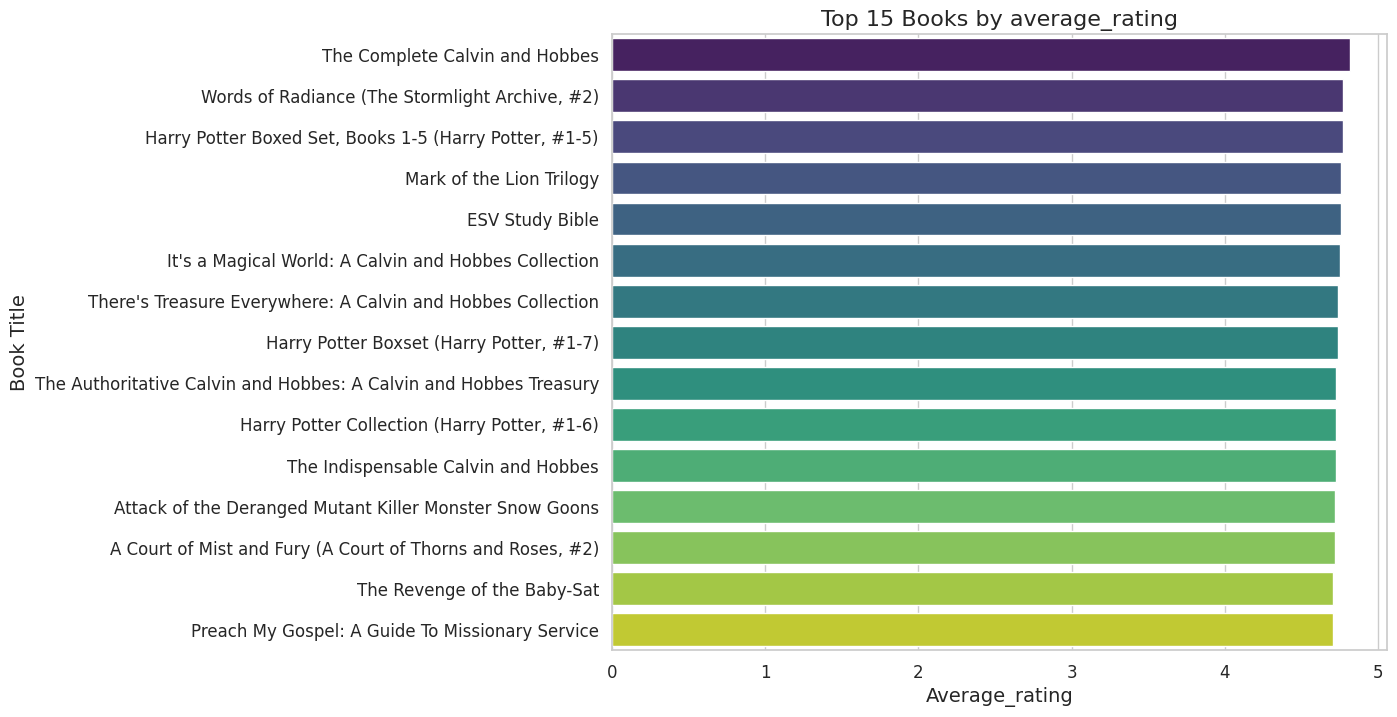

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_books_by(data, sort_by, top_n):
    sorted_data = data.sort_values(by=sort_by, ascending=False).head(top_n)

    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=sort_by, y='title', data=sorted_data, palette='viridis')

    ax.set_title(f'Top {top_n} Books by {sort_by}', fontsize=16)
    ax.set_xlabel(sort_by.capitalize(), fontsize=14)
    ax.set_ylabel('Book Title', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()

plot_books_by(book_sorted_ratings, 'average_rating', 15)


In [43]:
#Top Popular Books
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
3,To Kill a Mockingbird,Harper Lee,4.25,3198671,72586
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664,51992
5,The Fault in Our Stars,John Green,4.26,2346404,140739
6,The Hobbit,J.R.R. Tolkien,4.25,2071616,37653
7,The Catcher in the Rye,J.D. Salinger,3.79,2044241,44920
9,Pride and Prejudice,Jane Austen,4.24,2035490,49152
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,3.85,2001311,25112


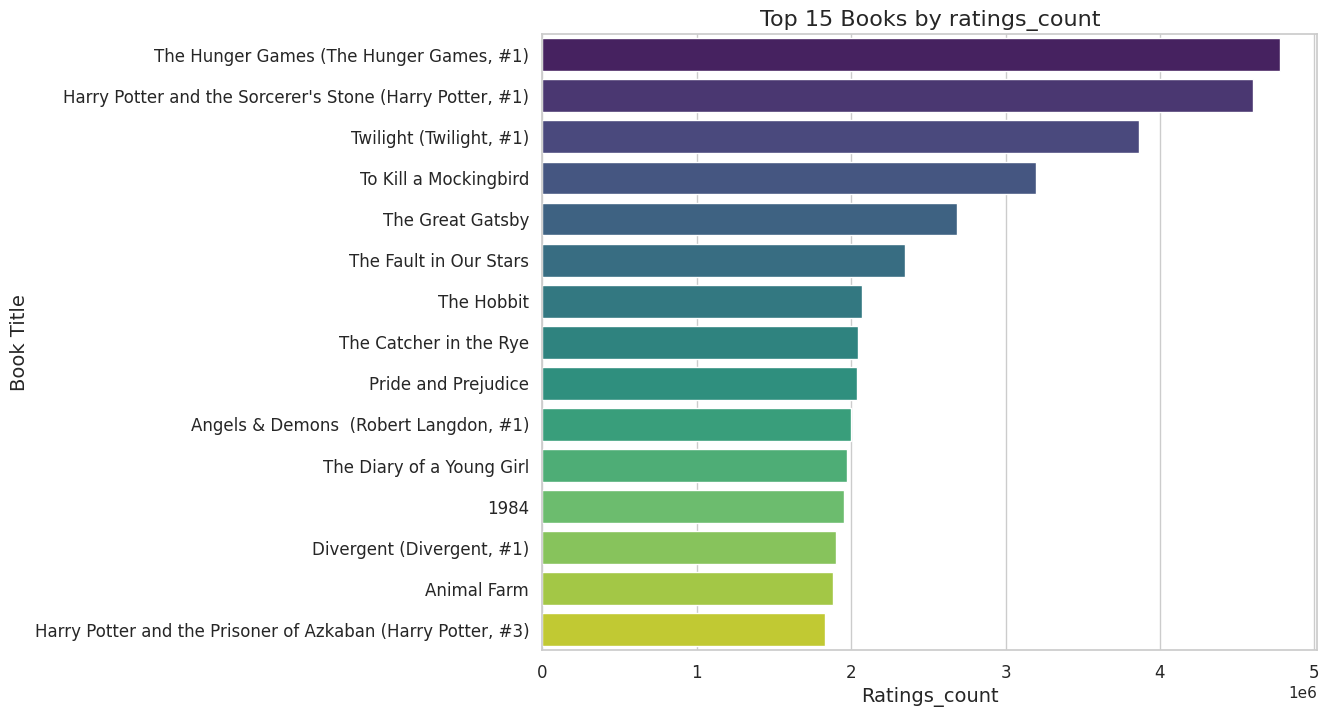

In [44]:
plot_books_by(book_sorted_ratings_count, 'ratings_count', 15)

In [46]:
#Top Text-Reviewed Books
book_sorted_reviews_count = books[books['ratings_count']>=1000].sort_values('work_text_reviews_count', ascending=False)
book_sorted_reviews_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
5,The Fault in Our Stars,John Green,4.26,2346404,140739
29,Gone Girl,Gillian Flynn,4.03,512475,121614
11,"Divergent (Divergent, #1)",Veronica Roth,4.24,1903563,101023
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,1719760,96274
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
46,The Book Thief,Markus Zusak,4.36,1159741,93611
60,The Girl on the Train,Paula Hawkins,3.88,1008778,93600
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.30,1831039,88538
30,The Help,Kathryn Stockett,4.45,1531753,78204


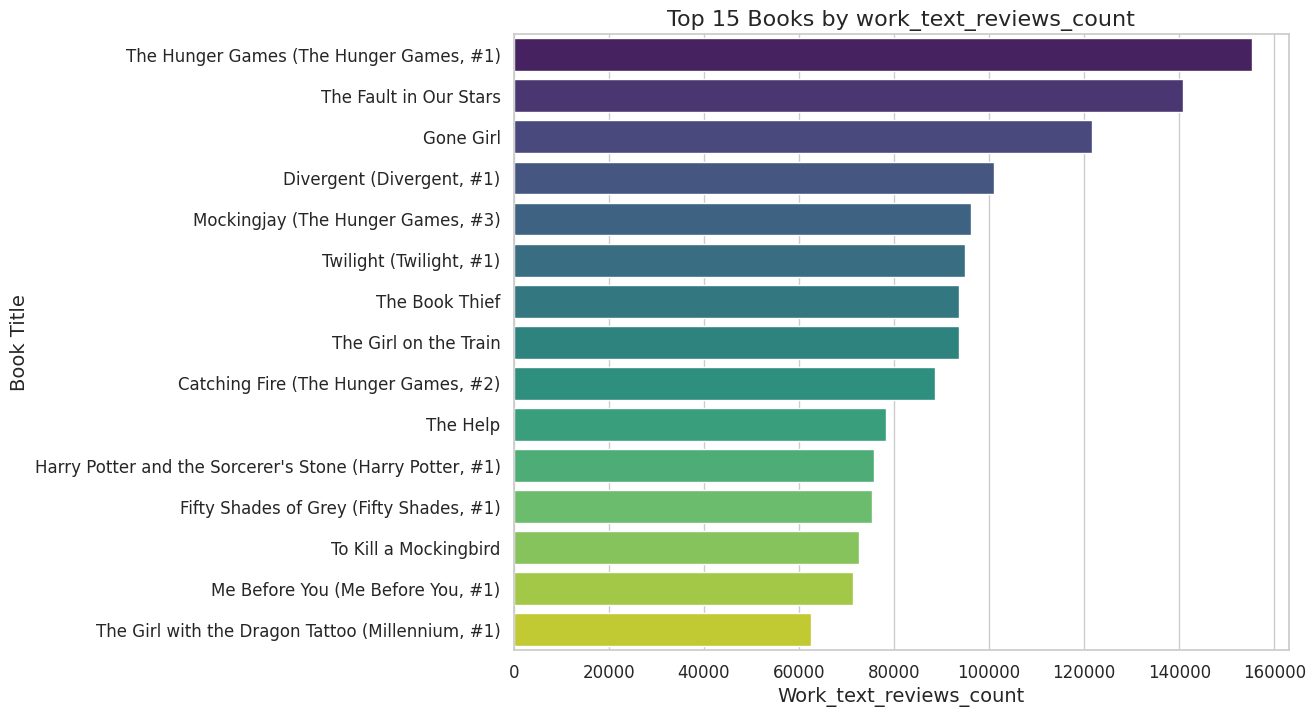

In [47]:
plot_books_by(book_sorted_reviews_count, 'work_text_reviews_count', 15)

In [48]:
#Top Scored Books
from sklearn.preprocessing import MinMaxScaler
cols = ['ratings_count','average_rating']
scaler = MinMaxScaler()
df_normalized = books[important_columns].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

df_normalized.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808743,95009
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668899,72586
4,The Great Gatsby,F. Scott Fitzgerald,0.604255,0.561110,51992


In [49]:
df_normalized['book_score'] = 0.5 * df_normalized['ratings_count'] + 0.5 * df_normalized['average_rating']
df_normalized_sorted_score = df_normalized.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count,book_score
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867,0.900503
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254,0.897872
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668899,72586,0.713173
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808743,95009,0.638414
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",0.910638,0.364981,51942,0.637810


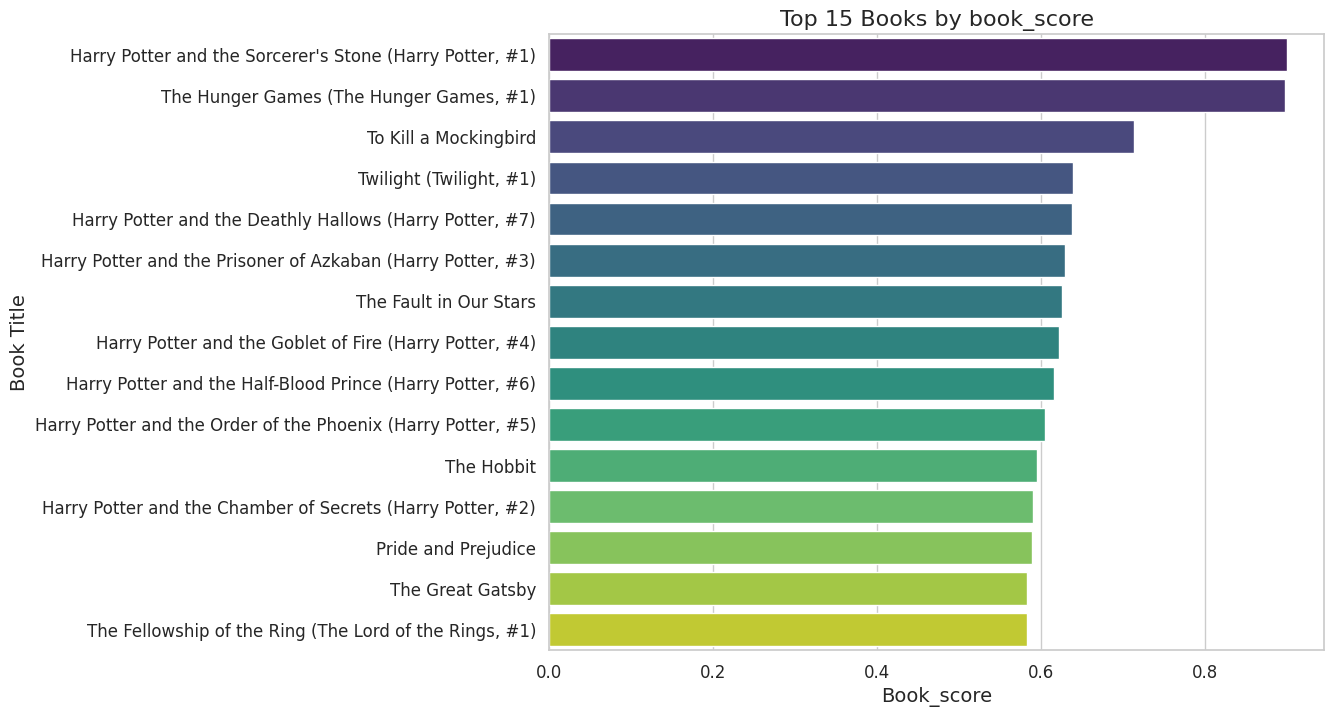

In [50]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

In [51]:
#language
lang_counts = pd.DataFrame(books['language_code'].value_counts())
lang_counts.columns = ['counts']
lang_counts


,counts
language_code,
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13


In [52]:
len(lang_counts)

25

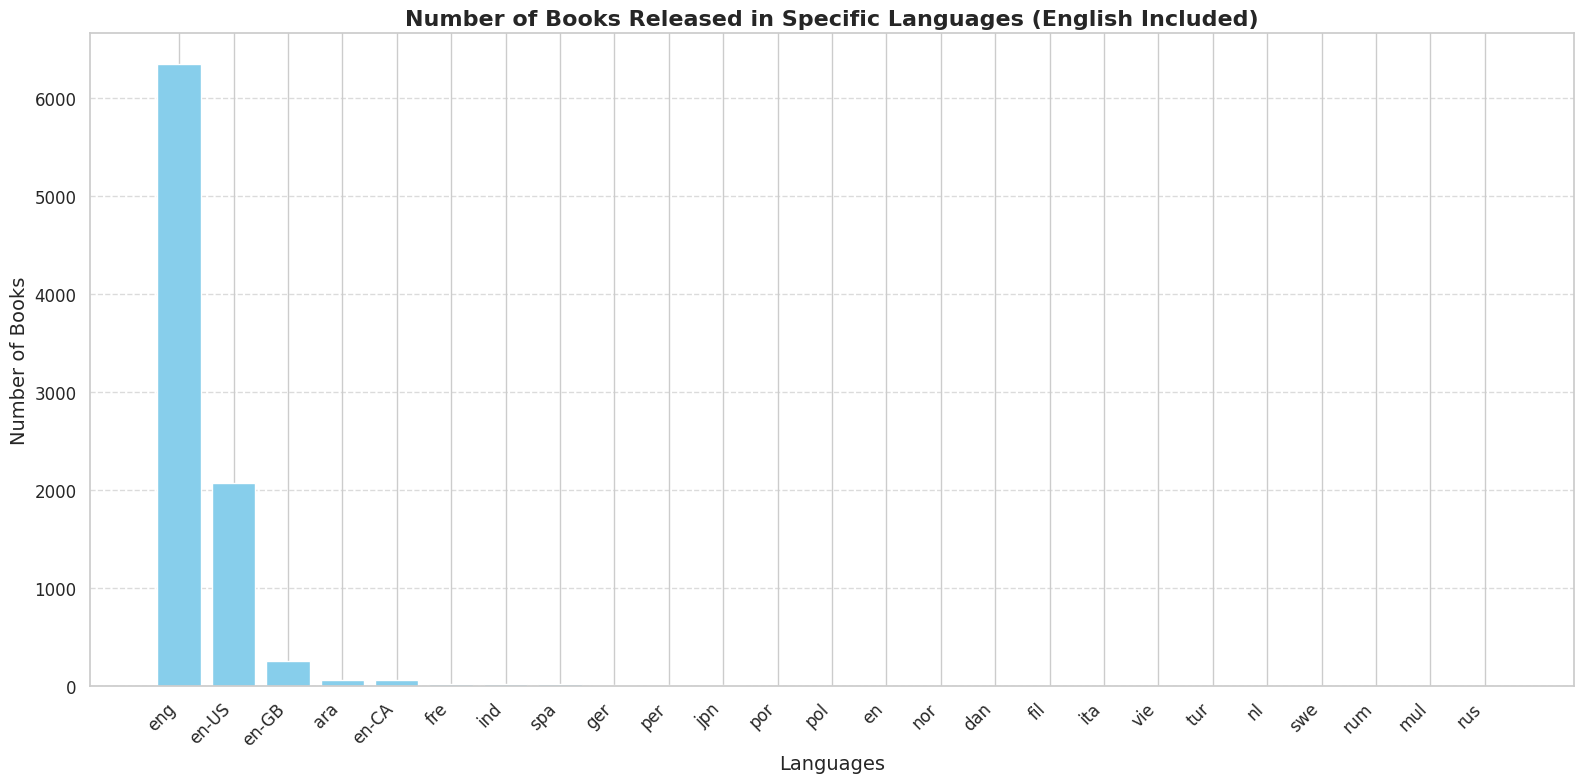

In [53]:
plt.figure(figsize=(16, 8))
plt.title("Number of Books Released in Specific Languages (English Included)", weight='bold', fontsize=16)
plt.bar(x=lang_counts.index, height=lang_counts['counts'], color='skyblue')
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [54]:
lang_counts = lang_counts.drop(["en-US", "en-GB", "eng", "en-CA"])

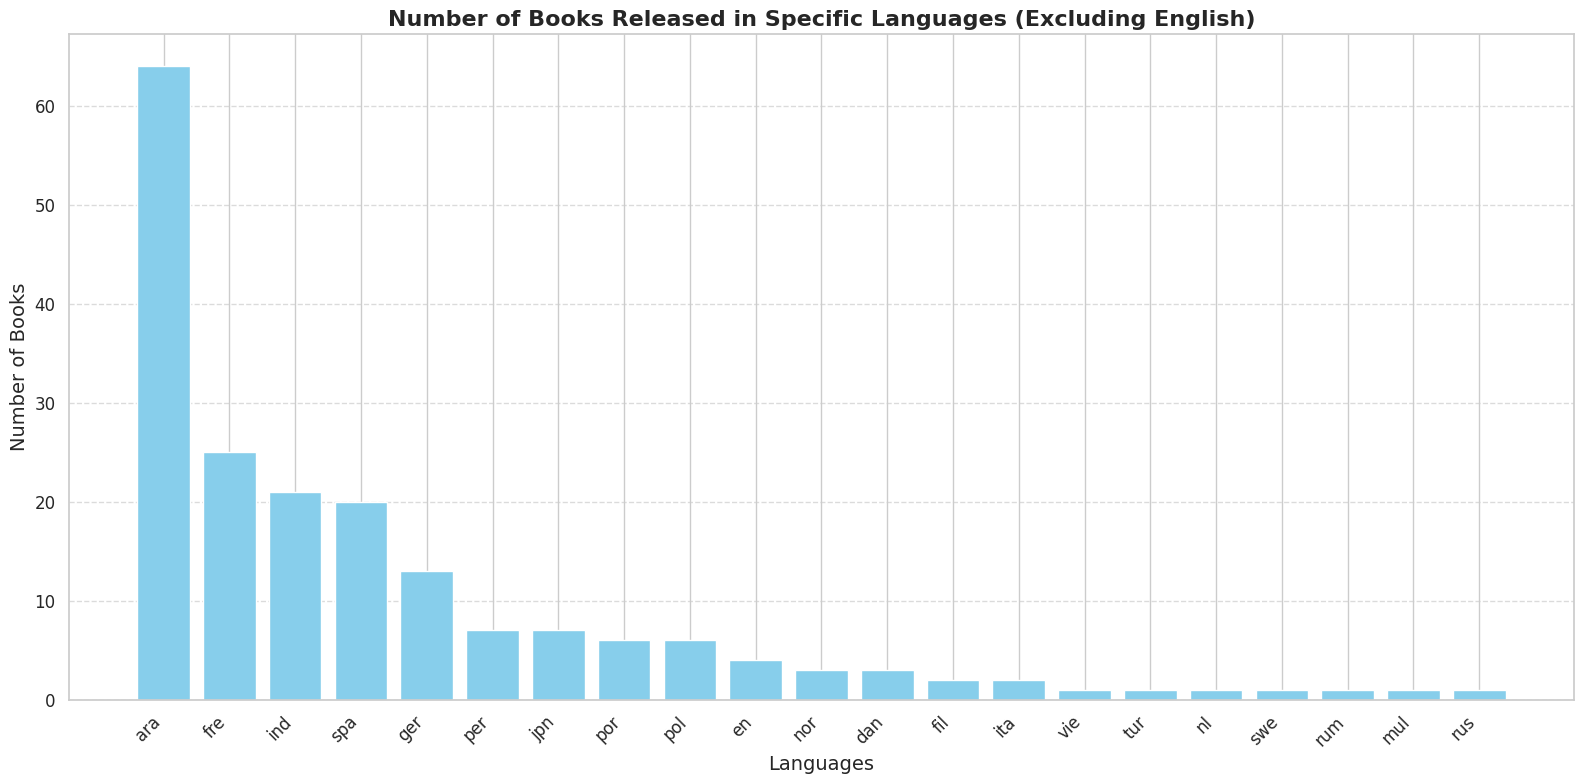

In [55]:
plt.figure(figsize=(16, 8))
plt.title("Number of Books Released in Specific Languages (Excluding English)", weight='bold', fontsize=16)
plt.bar(x=lang_counts.index, height=lang_counts['counts'], color='skyblue')
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


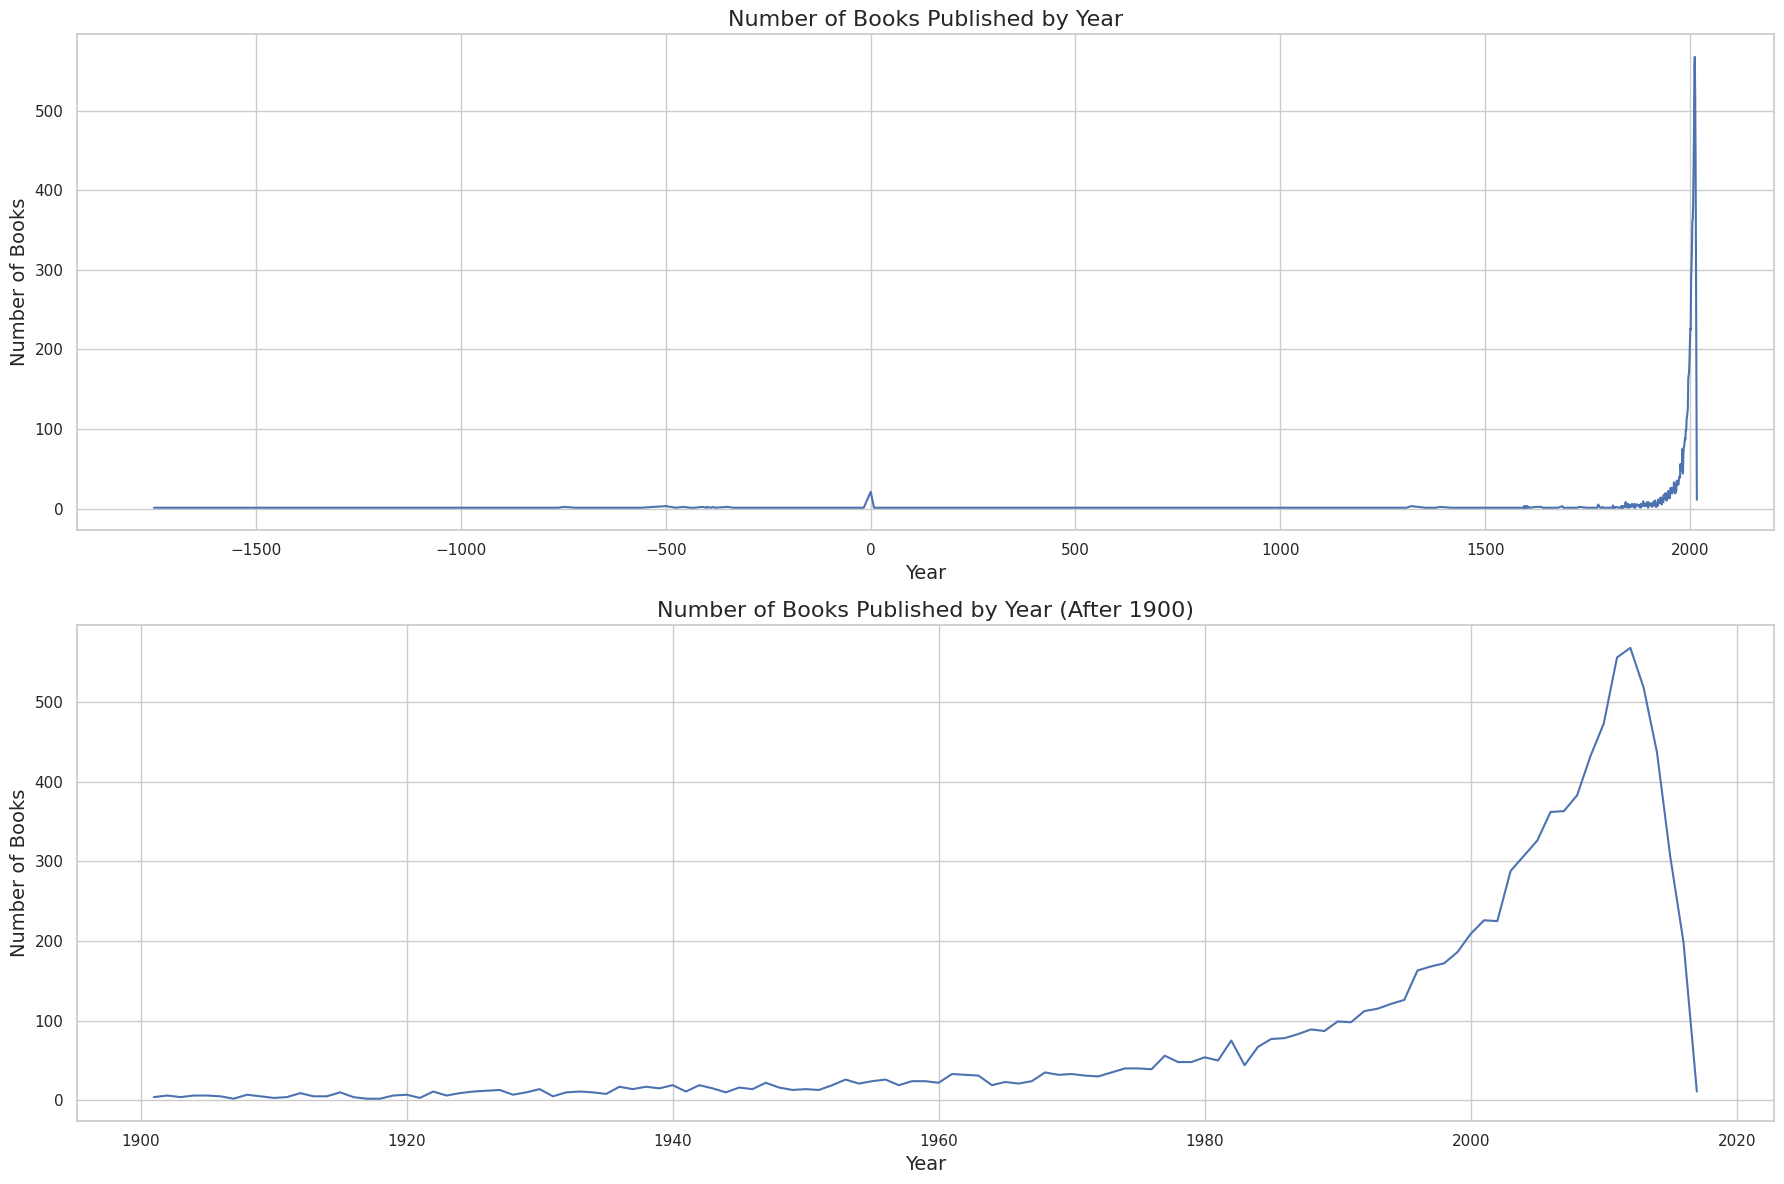

Years with more than 200 books published:
original_publication_year
2000    209
2001    226
2002    225
2003    288
2004    307
2005    326
2006    362
2007    363
2008    383
2009    432
2010    473
2011    556
2012    568
2013    518
2014    437
2015    306
Name: title, dtype: int64

Sample of earliest published books:
                                               title  \
2075                           The Epic of Gilgamesh   
2141                           The Iliad/The Odyssey   
340                                        The Iliad   
6165                  The I Ching or Book of Changes   
78                                       The Odyssey   
1119                                  Aesop's Fables   
402                                   The Art of War   
5636                                  The Dhammapada   
9678  The Upanishads: Translations from the Sanskrit   
7777                                    The Analects   

      original_publication_year  
2075                      

In [57]:
#Date

import numpy as np

# Fill NaN values with a placeholder value (e.g., 0)
books['original_publication_year'] = books['original_publication_year'].fillna(0)

# Convert 'original_publication_year' to integer
books['original_publication_year'] = books['original_publication_year'].astype(int)

# Group by 'original_publication_year' and count the number of books
year_count = books.groupby('original_publication_year')['title'].count()

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Plot all years
axes[0].plot(year_count)
axes[0].set_title('Number of Books Published by Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Number of Books', fontsize=14)

# Plot years after 1900
axes[1].plot(year_count[year_count.index > 1900])
axes[1].set_title('Number of Books Published by Year (After 1900)', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Number of Books', fontsize=14)

# Add grid lines
axes[0].grid(True)
axes[1].grid(True)

# Tight layout
plt.tight_layout()

# Show plots
plt.show()

# Print insights
print("Years with more than 200 books published:")
print(year_count[year_count > 200])

# Display sample of earliest and latest published books
print("\nSample of earliest published books:")
print(books[['title', 'original_publication_year']].sort_values('original_publication_year').head(10))
print("\nSample of latest published books:")
print(books[['title', 'original_publication_year']].sort_values('original_publication_year').tail(10))


In [58]:
#Authors
books.authors.value_counts()

authors
Stephen King                                                                                                                                                                                                                              60
Nora Roberts                                                                                                                                                                                                                              59
Dean Koontz                                                                                                                                                                                                                               47
Terry Pratchett                                                                                                                                                                                                                           42
Agatha Christie                             

The number of books in the data for J.K. Rowling is 27.
Number of books with multiple authors is 2079.


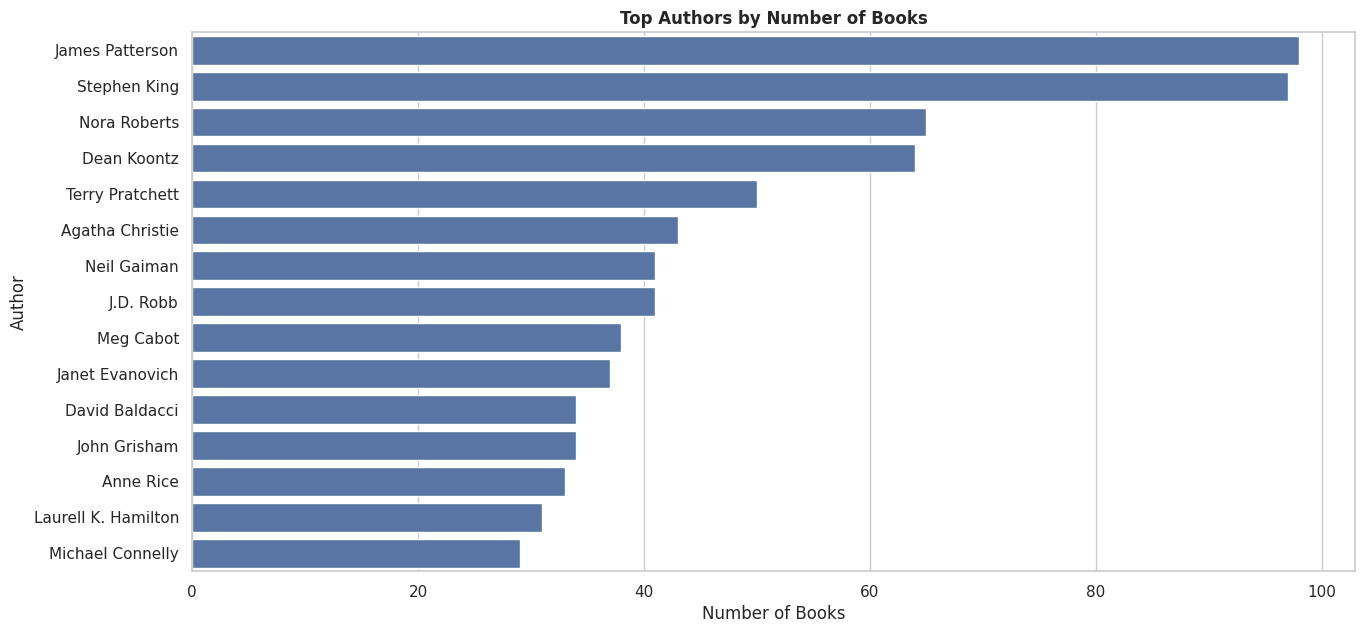

In [59]:
# Get the counts of books by authors
author_counts = books['authors'].value_counts()

# Filter books by a specific author (e.g., J.K. Rowling)
selected_author = 'J.K. Rowling'
author_books = books[books['authors'].apply(lambda x: selected_author in x)]

# Print the number of books for the selected author
print('The number of books in the data for {} is {}.'.format(selected_author, len(author_books)))

# Extract authors with multiple authors
multi_authors = books[books['authors'].str.contains(',')]

# Print the number of books with multiple authors
print('Number of books with multiple authors is {}.'.format(len(multi_authors)))

# Split authors and create a DataFrame with individual authors
authors_list = books['authors'].apply(lambda x: [a.strip() for a in x.split(',')] if ',' in x else x)
splitted_authors = authors_list.apply(pd.Series).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'

# Combine the new authors DataFrame with relevant columns from the original DataFrame
df_edited_authors = books.drop('authors', axis=1).join(splitted_authors)

# Get the counts of books by individual authors
author_counts_edited = df_edited_authors['authors'].value_counts()

# Plot the top authors by the number of books
def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15, y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot_authors_by(author_counts_edited,
                title='Top Authors by Number of Books',
                xlabel='Number of Books',
                n=15)


In [60]:
#Authors with Most Books

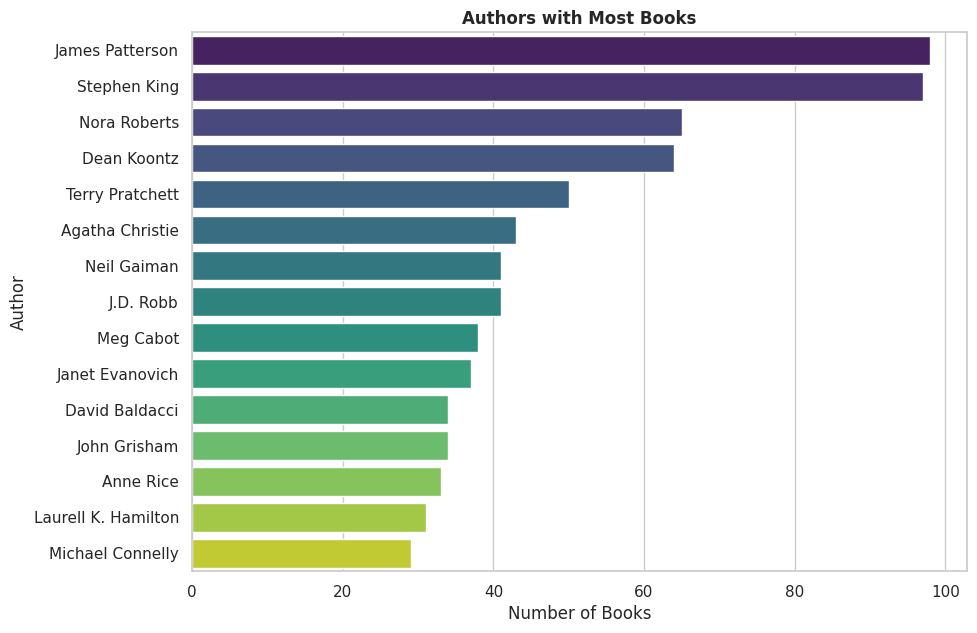

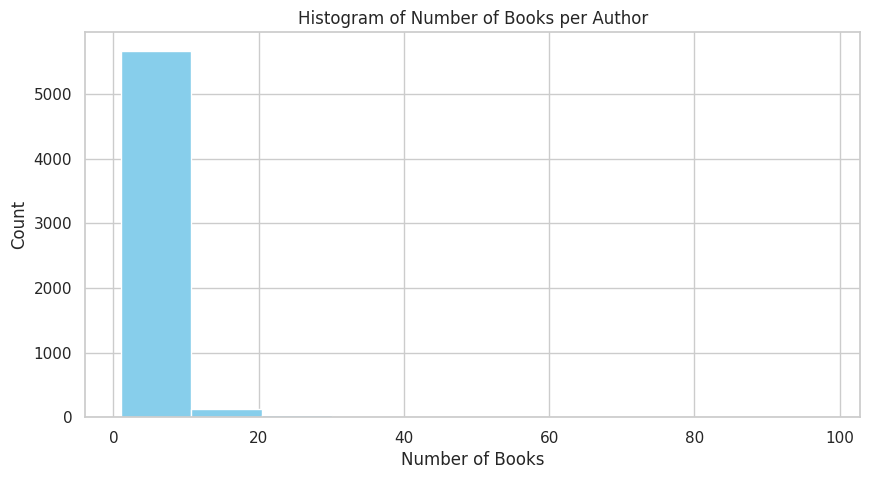

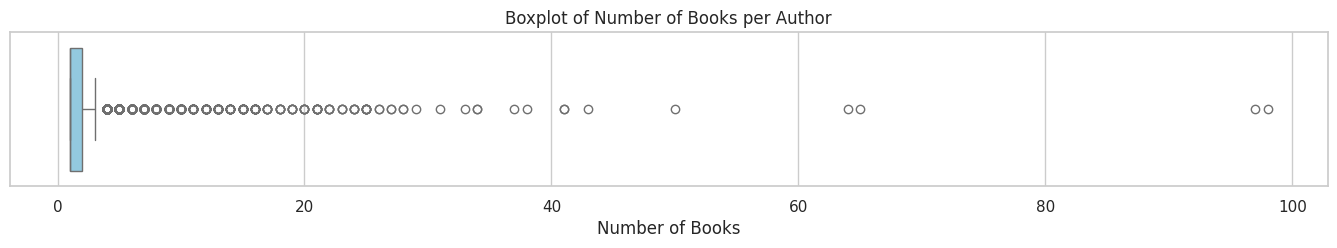

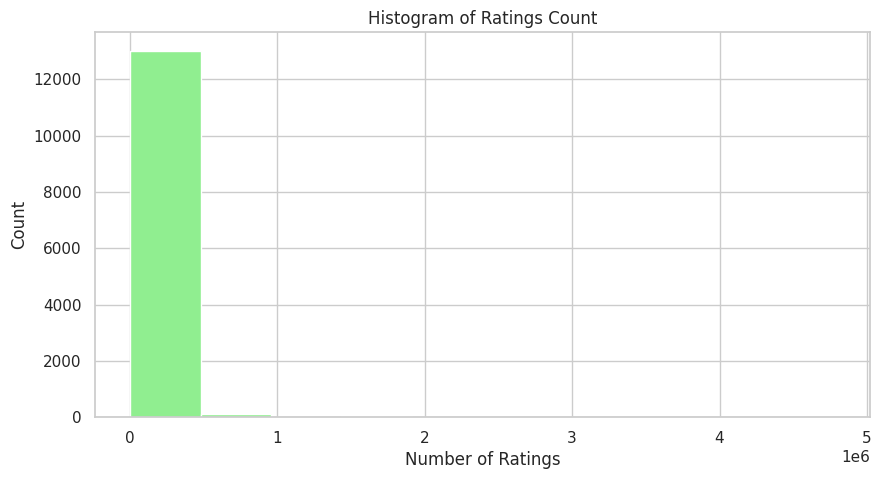

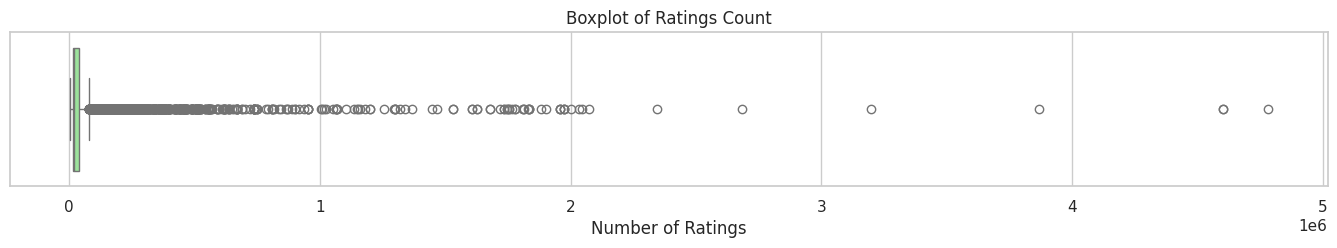

In [62]:
# Get authors with the most books
authors_most_with_books = df_edited_authors['authors'].value_counts().head(15)

# Plot authors with the most books
plt.figure(figsize=(10, 7))
sns.barplot(x=authors_most_with_books.values, y=authors_most_with_books.index, palette='viridis')
plt.title('Authors with Most Books', weight='bold')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# Function to filter authors with at least n books
def at_least_books(df, n):
    return df['authors'].isin(df['authors'].value_counts()[df['authors'].value_counts() >= n].index)

# Function to filter authors with at least n ratings count
def at_least_ratings_count(df, n):
    return df['ratings_count'] >= n

# Plot histogram of the number of books per author
plt.figure(figsize=(10, 5))
plt.hist(df_edited_authors['authors'].value_counts(), color='skyblue')
plt.xlabel('Number of Books')
plt.ylabel('Count')
plt.title('Histogram of Number of Books per Author')
plt.show()

# Plot boxplot of the number of books per author
plt.figure(figsize=(17, 2))
sns.boxplot(x=df_edited_authors['authors'].value_counts(), orient='h', color='skyblue')
plt.xlabel('Number of Books')
plt.title('Boxplot of Number of Books per Author')
plt.show()

# Plot histogram of ratings count
plt.figure(figsize=(10, 5))
plt.hist(df_edited_authors['ratings_count'], color='lightgreen')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.title('Histogram of Ratings Count')
plt.show()

# Plot boxplot of ratings count
plt.figure(figsize=(17, 2))
sns.boxplot(x=df_edited_authors['ratings_count'], orient='h', color='lightgreen')
plt.xlabel('Number of Ratings')
plt.title('Boxplot of Ratings Count')
plt.show()

# Filter conditions
c1 = at_least_books(df_edited_authors, 5)
c2 = at_least_ratings_count(df_edited_authors, 50000)


In [63]:
#Best Rating Authors
best_rating_authors = df_edited_authors[c1 & c2].groupby('authors')['average_rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)

authors
Bill Watterson        4.630000
Francine Rivers       4.540000
Mary GrandPré         4.497143
Sarah J. Maas         4.496667
Clive Barker          4.440000
Tsugumi Ohba          4.420000
Takeshi Obata         4.420000
Fiona Staples         4.410000
George R.R. Martin    4.393333
Brandon Sanderson     4.388333
Cassandra Clare       4.366364
Robert Kirkman        4.365000
Bisco Hatori          4.360000
A.A. Milne            4.350000
Malcolm Jones III     4.340000
Name: average_rating, dtype: float64

In [64]:
print('Best Rating Authors are {} of {} authors'.format(len(best_rating_authors),len(df_edited_authors.authors.unique())))

Best Rating Authors are 404 of 5841 authors


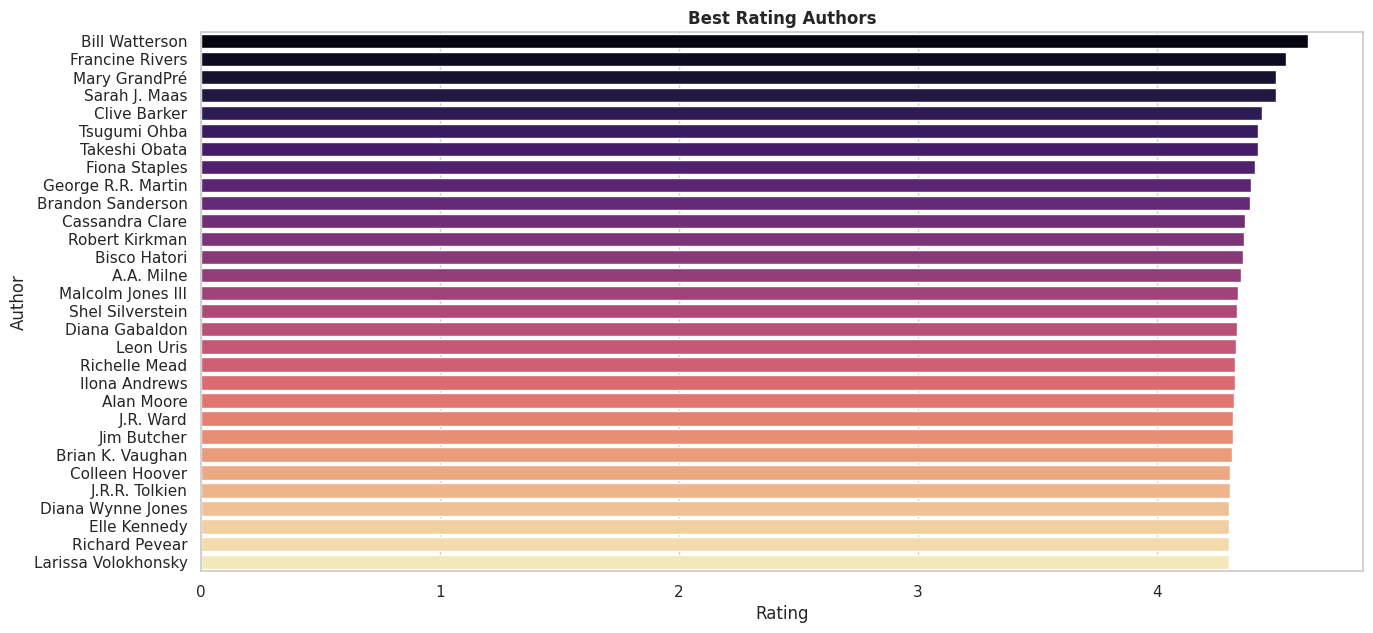

In [69]:
# Function to plot authors by a specific metric
def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15, y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index, palette='magma')
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage with 'best_rating_authors' DataFrame
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 30)


In [70]:
#Most Ratings Authors
most_ratings_authors = df_edited_authors.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

authors
J.K. Rowling           17080451
Mary GrandPré          15205590
Stephen King            8946016
Suzanne Collins         8646393
Stephenie Meyer         8549729
J.R.R. Tolkien          5728861
Rick Riordan            5254151
Dan Brown               5002760
William Shakespeare     4622465
Cassandra Clare         4370216
Nicholas Sparks         4302436
John Green              4210889
Jane Austen             4169899
George Orwell           4047622
C.S. Lewis              3943519
Name: ratings_count, dtype: int64

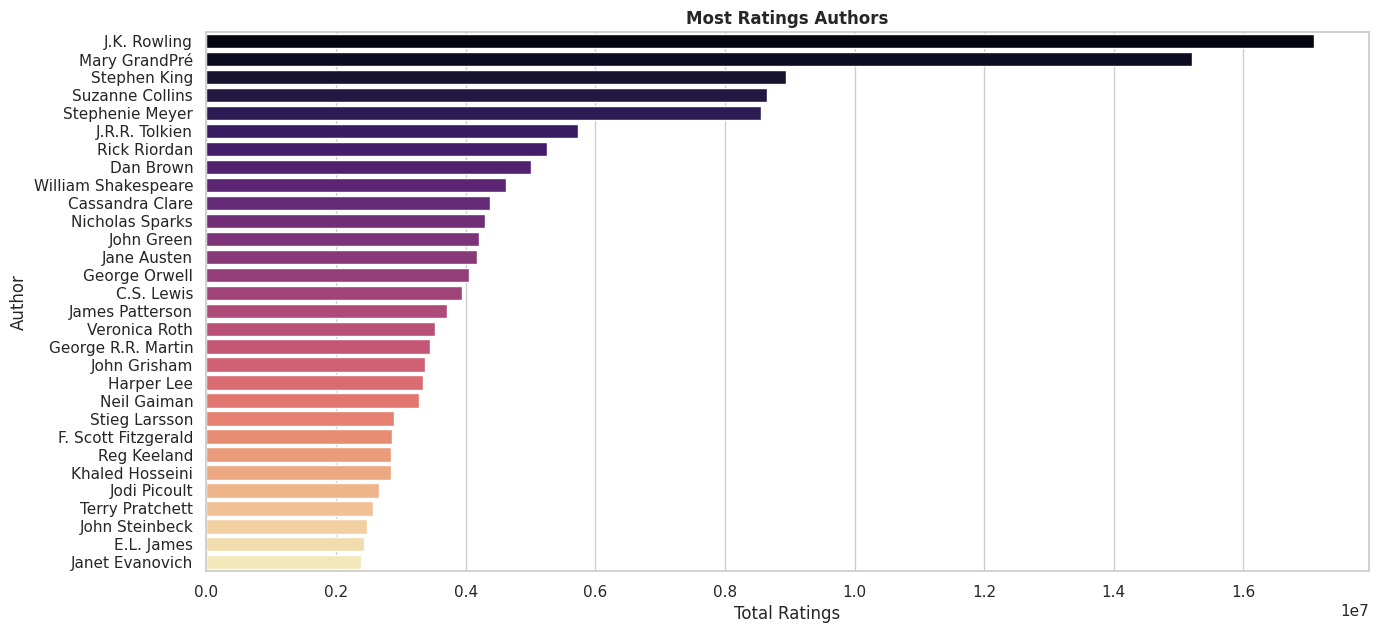

In [71]:
plot_authors_by(most_ratings_authors, 'Most Ratings Authors', 'Total Ratings', 30)

In [72]:
#Best Authors
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
best_rating_authors_normalized = pd.DataFrame(best_rating_authors.values, index=best_rating_authors.index, columns=['rating'])
best_rating_authors_normalized['rating'] = scaler.fit_transform(best_rating_authors_normalized)
best_rating_authors_normalized.head()


,rating
authors,
Bill Watterson,1.000000
Francine Rivers,0.936620
Mary GrandPré,0.906439
Sarah J. Maas,0.906103
Clive Barker,0.866197


In [74]:
authors_rating_score = df_edited_authors['authors'].apply(lambda x: best_rating_authors_normalized.loc[x].rating if x in best_rating_authors_normalized.index else 0.0)
authors_rating_score.head()

0    0.718310
1    0.696303
1    0.906439
2    0.403756
3    0.000000
Name: authors, dtype: float64

In [75]:
most_ratings_authors_normalized = pd.DataFrame(most_ratings_authors.values, index=most_ratings_authors.index, columns=['total_rating'])
most_ratings_authors_normalized['total_rating'] = scaler.fit_transform(most_ratings_authors_normalized)
most_ratings_authors_normalized.head()

,total_rating
authors,
J.K. Rowling,1.000000
Mary GrandPré,0.890216
Stephen King,0.523682
Suzanne Collins,0.506137
Stephenie Meyer,0.500477


In [76]:
authors_ratings_count_score = df_edited_authors['authors'].apply(lambda x: most_ratings_authors_normalized.loc[x].total_rating)
authors_ratings_count_score.head()


0    0.506137
1    1.000000
1    0.890216
2    0.500477
3    0.195261
Name: authors, dtype: float64

In [77]:
df_edited_authors['author_score'] = 0.5 * authors_rating_score + 0.5 * authors_ratings_count_score
df_edited_authors['author_score'].head()

0    0.612224
1    0.848151
1    0.898327
2    0.452116
3    0.097631
Name: author_score, dtype: float64

In [78]:
best_authors = df_edited_authors.groupby('authors')['author_score'].mean().sort_values(ascending=False)
best_authors.head(15)

authors
Mary GrandPré         0.898327
J.K. Rowling          0.848151
Suzanne Collins       0.612224
J.R.R. Tolkien        0.553017
Cassandra Clare       0.535041
Rick Riordan          0.532272
Stephen King          0.525440
George R.R. Martin    0.517450
Bill Watterson        0.512536
Sarah J. Maas         0.487520
Francine Rivers       0.480846
Brandon Sanderson     0.460514
Shel Silverstein      0.459600
Richelle Mead         0.455519
Stephenie Meyer       0.452116
Name: author_score, dtype: float64

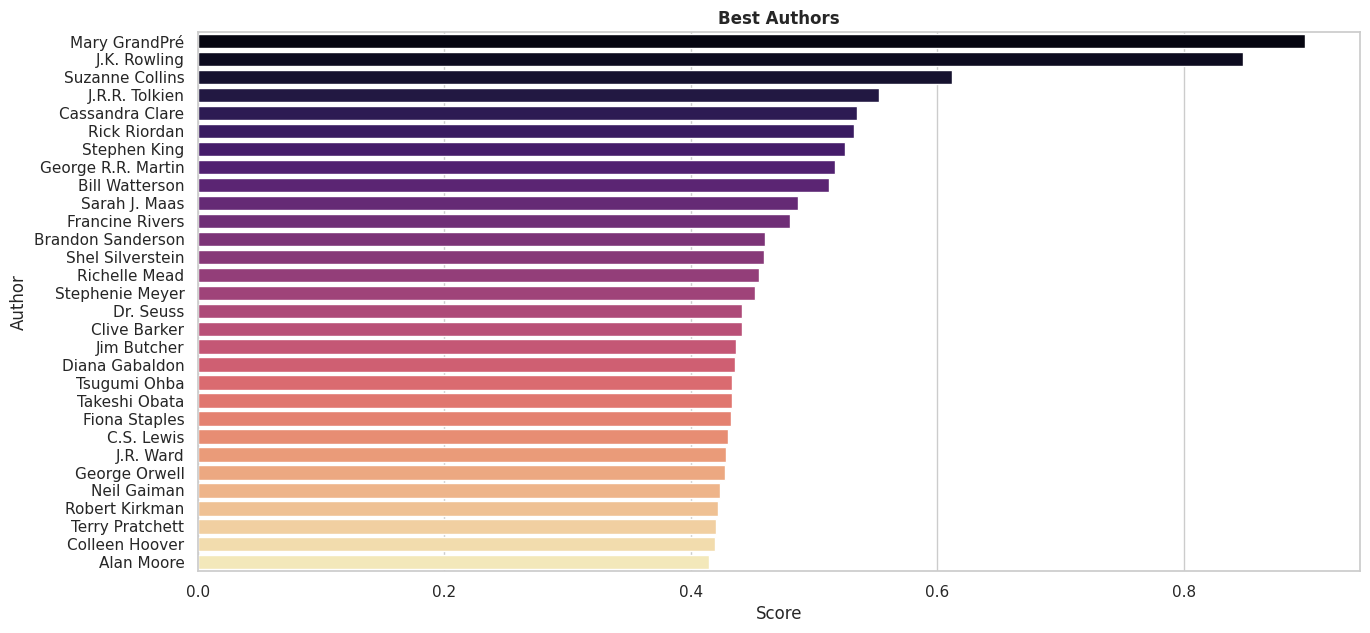

In [79]:
plot_authors_by(best_authors, 'Best Authors', 'Score', 30)


RATINGS

In [81]:
ratings.head()
print('There are {} ratings.'.format(ratings.shape[0]))
print('Number of users is {}'.format(len(ratings.user_id.unique())))

There are 981756 ratings.
Number of users is 53424


In [83]:
#Remove Duplicates Ratings
ratings[ratings.duplicated()==True]

,book_id,user_id,rating
1171,12,40251,4
2474,25,32635,5
2959,30,31760,4
3020,31,8669,5
3334,34,26097,1
...,...,...,...
979373,9975,3133,3
980520,9988,907,4
981044,9993,33994,4
981257,9995,28898,2


In [84]:
ratings[ratings.duplicated(keep=False)==True].head(6)

,book_id,user_id,rating
1170,12,40251,4
1171,12,40251,4
2473,25,32635,5
2474,25,32635,5
2958,30,31760,4
2959,30,31760,4


In [85]:
ratings_rmv_duplicates = ratings.drop_duplicates()
ratings_rmv_duplicates.shape


(980112, 3)

In [86]:
ratings_sample = ratings_rmv_duplicates.sample(frac=0.2)
ratings_sample.shape

(196022, 3)

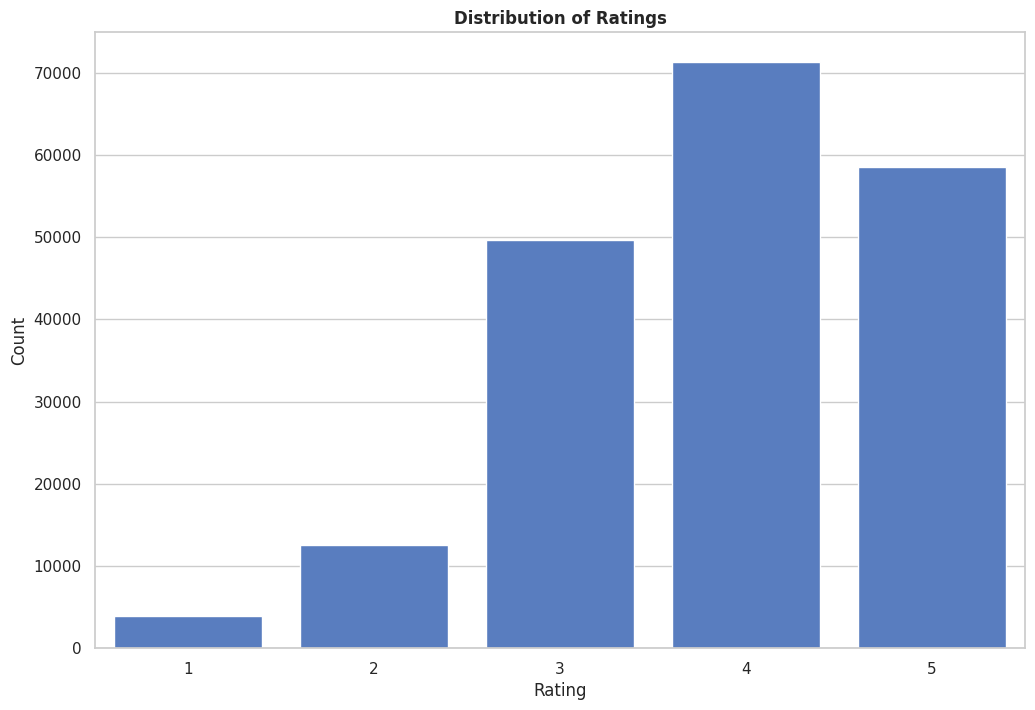

In [90]:
#Distribution of ratings
# Plot the count plot
sns.set_palette("muted")
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=ratings_sample)
plt.title('Distribution of Ratings', weight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [91]:
#Number of ratings per user

In [92]:
ratings_per_user = ratings_sample.groupby('user_id')['user_id'].count()
ratings_per_user

user_id
1         1
3         1
7        12
9         3
10        2
         ..
53419     1
53420     3
53422     1
53423     2
53424     3
Name: user_id, Length: 40414, dtype: int64

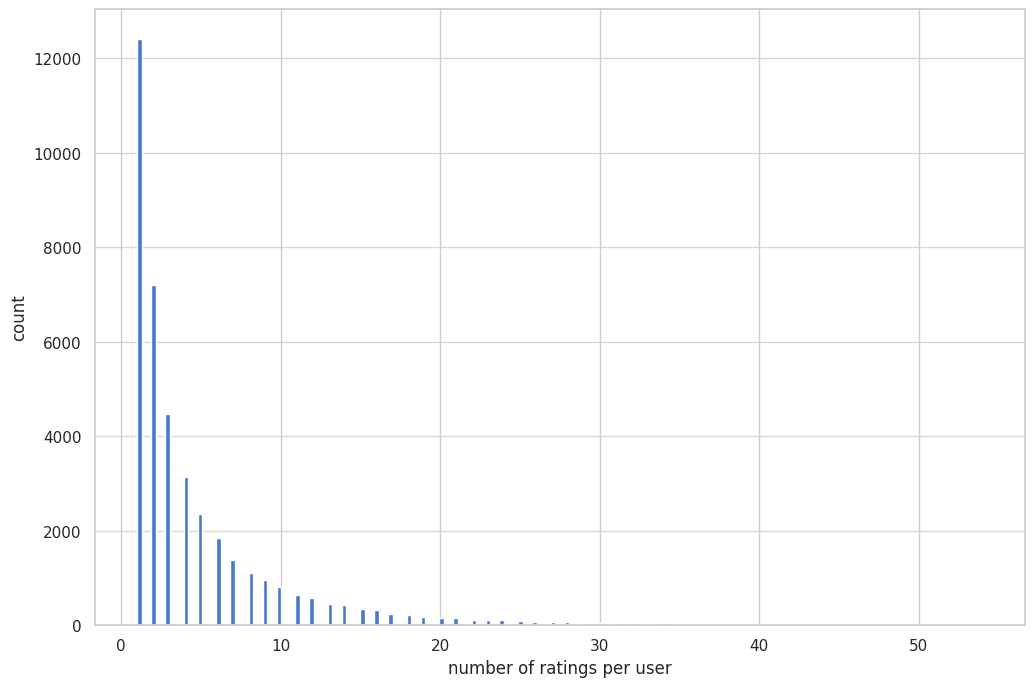

In [93]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_user ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

In [94]:
#Distribution of mean user rating
mean_rating_per_user = ratings_sample.groupby('user_id')['rating'].mean()
mean_rating_per_user


user_id
1        4.000000
3        1.000000
7        3.916667
9        3.333333
10       4.500000
           ...   
53419    2.000000
53420    3.333333
53422    3.000000
53423    5.000000
53424    4.000000
Name: rating, Length: 40414, dtype: float64

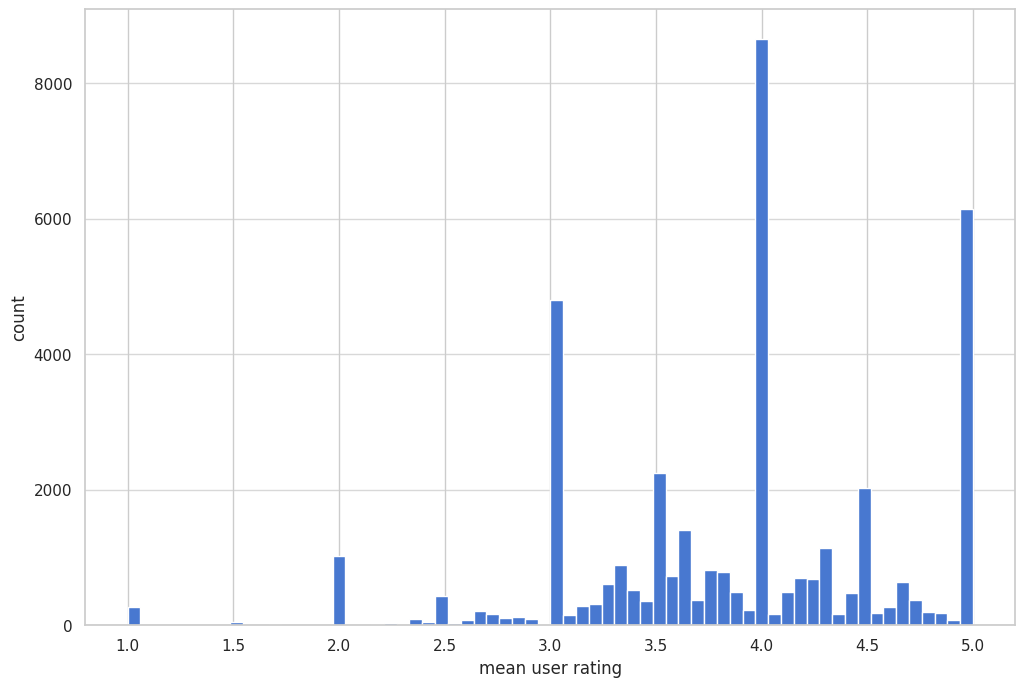

In [95]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_user, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean user rating')
plt.ylabel('count');

In [96]:
#Number of ratings per book

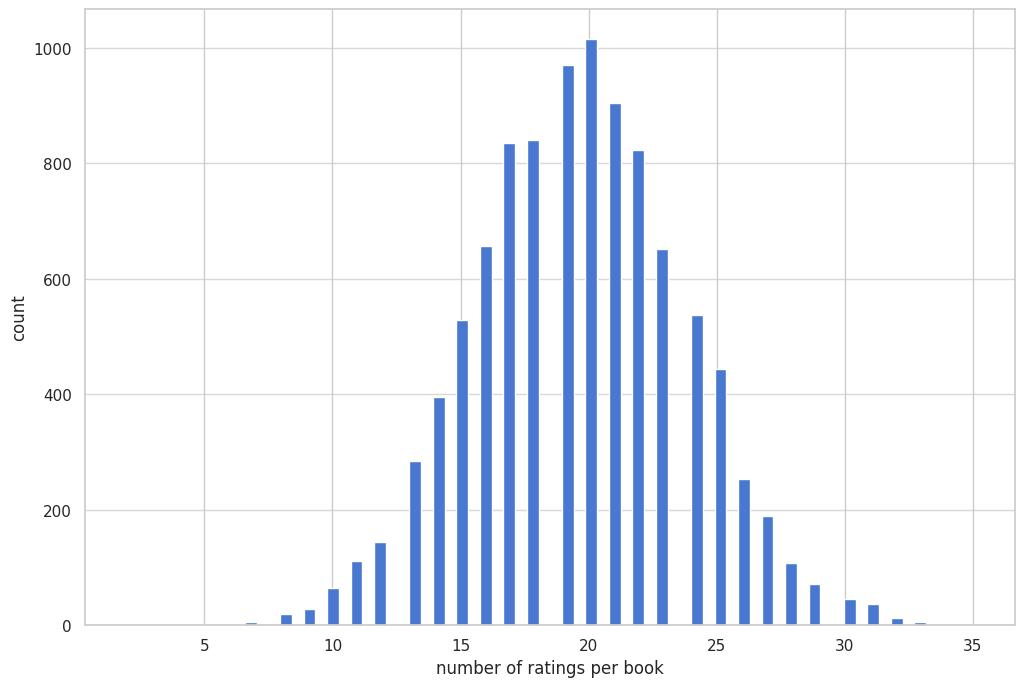

In [97]:
ratings_per_book = ratings_sample.groupby('book_id')['book_id'].count()
ratings_per_book
plt.figure(figsize=(12,8))
plt.hist(ratings_per_book ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per book')
plt.ylabel('count');

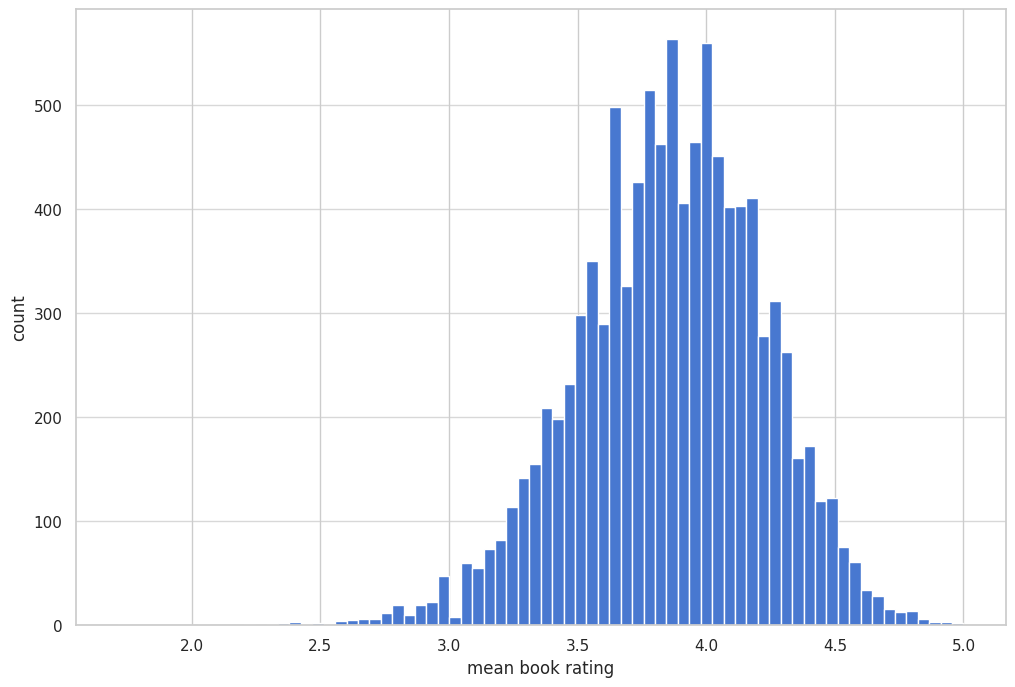

In [98]:
#Distribution of mean book ratings
mean_rating_per_book = ratings_sample.groupby('book_id')['rating'].mean()
mean_rating_per_book

plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');

TAGS

In [102]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [103]:
tags.shape

(34252, 2)

In [104]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [105]:

book_tags.shape

(999912, 3)

In [106]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction",
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

In [107]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [108]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]


In [109]:
print('Number of available tags is {} out of the {} tags in genres list'.format(available_genres.shape[0], len(genres)))

Number of available tags is 31 out of the 40 tags in genres list


In [110]:
available_books_with_genres = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
available_books_with_genres.shape

(60573, 3)

In [111]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [112]:
tag_counts.set_index(available_genres.tag_name, inplace=True)
tag_counts.head()


,count
tag_name,
art,30262
biography,172444
business,73249
christian,53864
classics,1756920


In [113]:
tag_counts.sort_values('count', ascending=False, inplace=True)
tag_counts.head()

,count
tag_name,
fiction,3688819
fantasy,3548157
classics,1756920
romance,1231926
mystery,872282


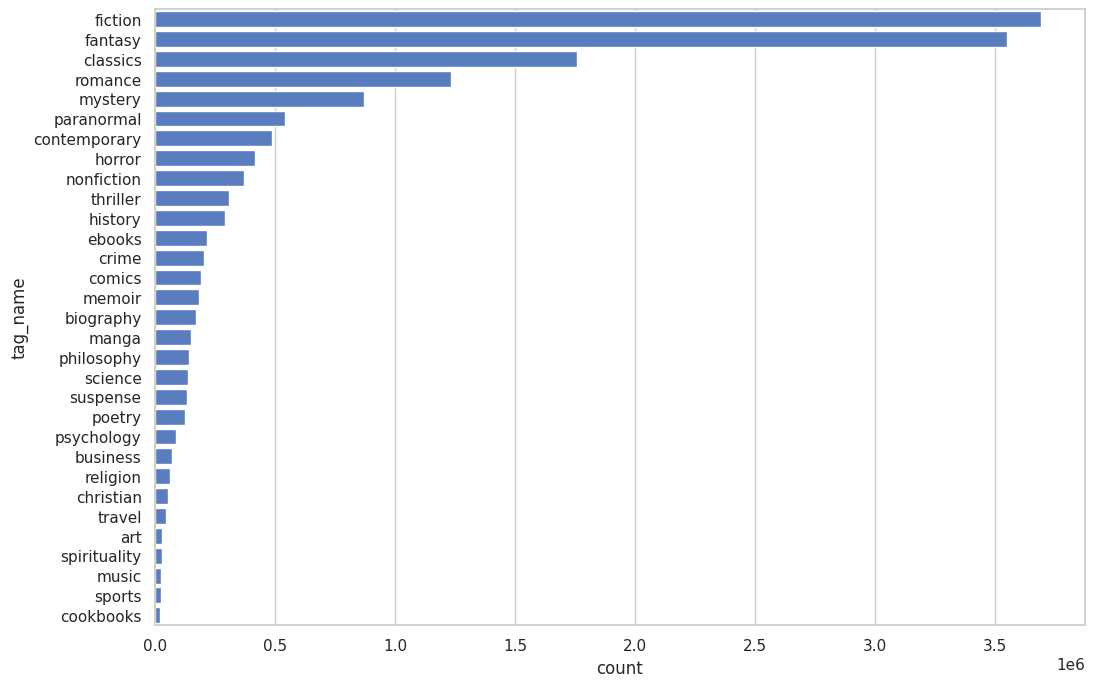

In [114]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y=tag_counts.index, data=tag_counts, orient='h');

In [115]:
#Our analysis of the correlation matrix between a book's average rating and various variables found only minor correlations, including those with rating counts. This suggests that factors beyond metadata, likely the intrinsic quality of the books, have a more significant influence on the ratings they receive.

In [116]:
cols = ['books_count','original_publication_year','average_rating','ratings_count','work_ratings_count','work_text_reviews_count']
corr = books[cols].corr()
corr

,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
books_count,1.000000,-0.269413,-0.069888,0.324235,0.333664,0.198698
original_publication_year,-0.269413,1.000000,-0.000423,-0.017778,-0.018127,0.033506
average_rating,-0.069888,-0.000423,1.000000,0.044990,0.045042,0.007481
ratings_count,0.324235,-0.017778,0.044990,1.000000,0.995068,0.779635
work_ratings_count,0.333664,-0.018127,0.045042,0.995068,1.000000,0.807009
work_text_reviews_count,0.198698,0.033506,0.007481,0.779635,0.807009,1.000000


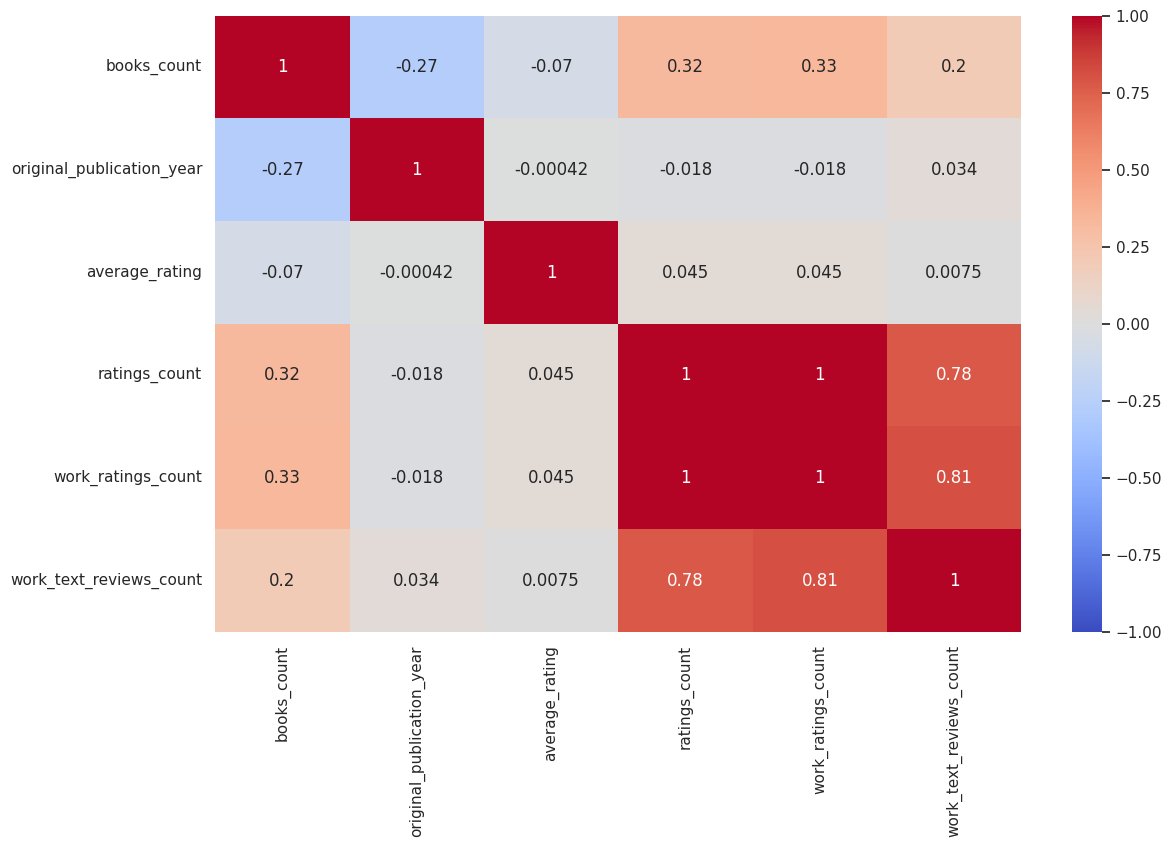

In [117]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot=True);

<Axes: >

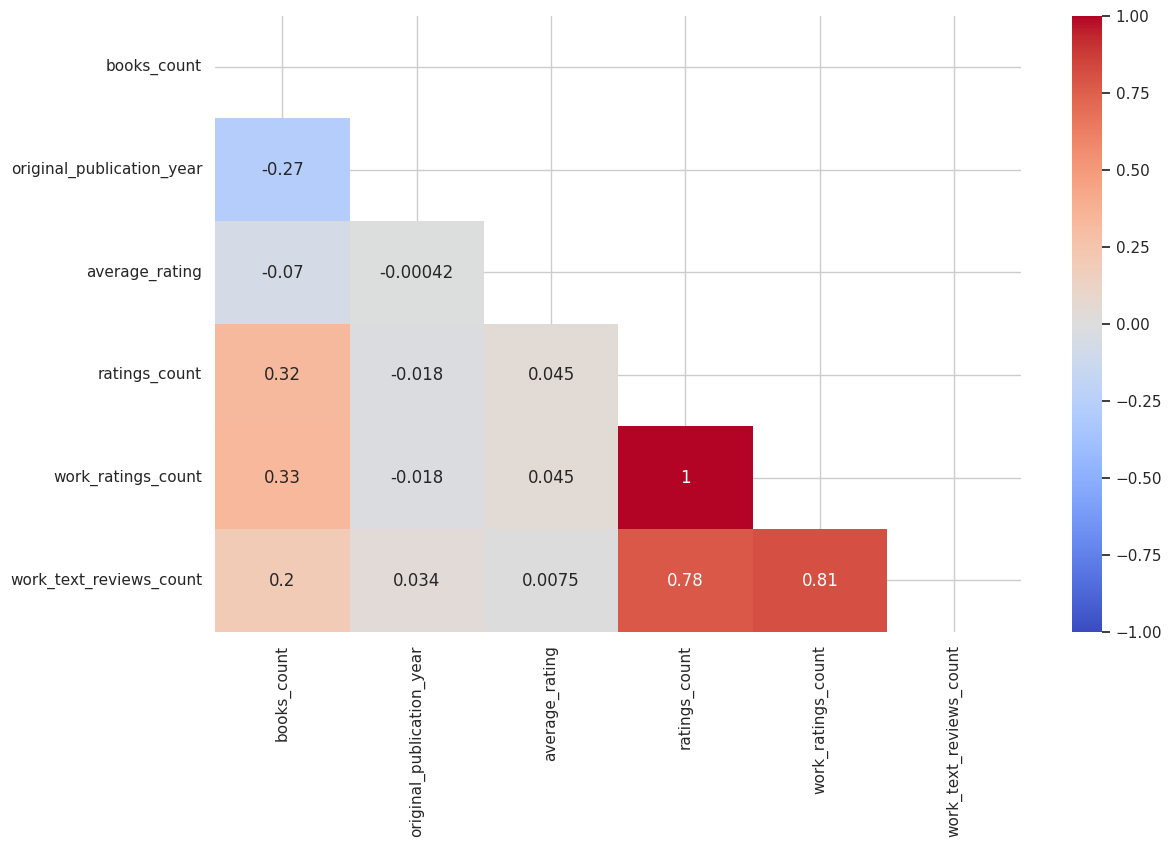

In [118]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask)

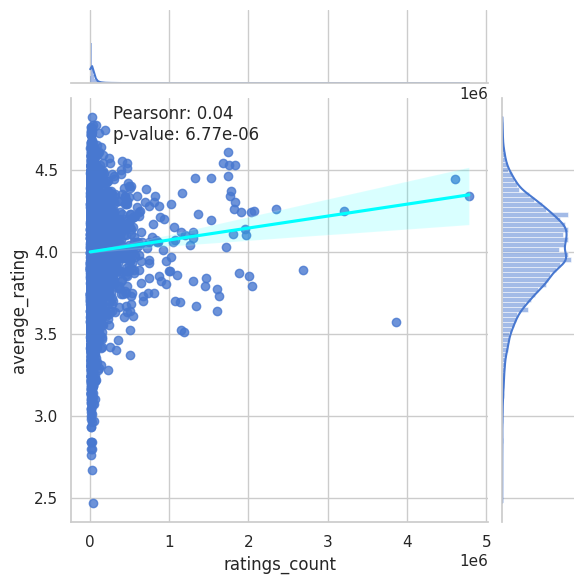

In [122]:
from scipy import stats

# Create a joint plot
jp = sns.jointplot(x='ratings_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)

# Calculate Pearson correlation coefficient and p-value
pearsonr_coef, p_value = stats.pearsonr(books['ratings_count'], books['average_rating'])

# Annotate the joint plot with Pearson correlation coefficient and p-value
jp.ax_joint.annotate(f"Pearsonr: {pearsonr_coef:.2f}\np-value: {p_value:.2e}", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

# Show the plot
plt.show()

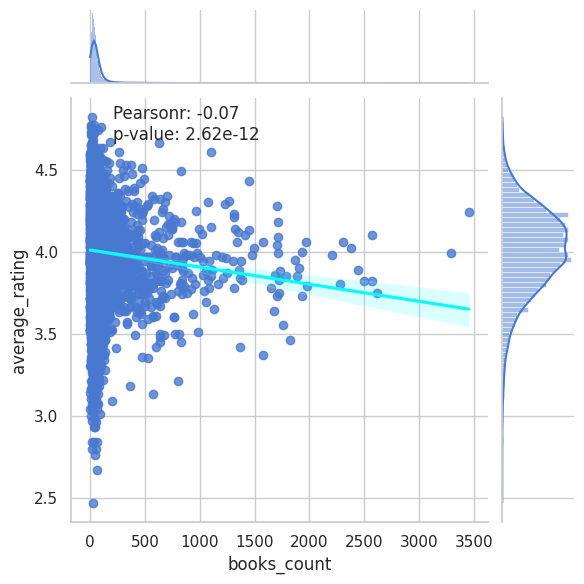

In [123]:
# Create a joint plot
jp = sns.jointplot(x='books_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)

# Calculate Pearson correlation coefficient and p-value
pearsonr_coef, p_value = stats.pearsonr(books['books_count'], books['average_rating'])

# Annotate the joint plot with Pearson correlation coefficient and p-value
jp.ax_joint.annotate(f"Pearsonr: {pearsonr_coef:.2f}\np-value: {p_value:.2e}", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

# Show the plot
plt.show()

In [124]:
#Series of Books
subtitle = 'the lord of the rings'
books[books.title.str.lower().str.find(subtitle) > -1][['title']].values

array([['The Fellowship of the Ring (The Lord of the Rings, #1)'],
       ['The Two Towers (The Lord of the Rings, #2)'],
       ['The Return of the King (The Lord of the Rings, #3)'],
       ['The Lord of the Rings (The Lord of the Rings, #1-3)'],
       ['J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings'],
       ['The Lord of the Rings: The Art of The Fellowship of the Ring'],
       ['The Lord of the Rings: Weapons and Warfare'],
       ['The Lord of the Rings: The Return of the King: Visual Companion'],
       ['The Lord of the Rings Sketchbook']], dtype=object)

In [125]:
book_series = books[books.title.str.contains('\(.*[,:]') == True][['title', 'average_rating']]
print('There are {} books that are in series'.format(book_series.shape[0]))


There are 4171 books that are in series


In [126]:
book_series.head()

,title,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,"Twilight (Twilight, #1)",3.57
8,"Angels & Demons (Robert Langdon, #1)",3.85
11,"Divergent (Divergent, #1)",4.24


In [127]:
series = book_series.copy()
series['title'] = series['title'].str.findall('\(.*[,:]').apply(lambda x: x.pop()[1:-1])
series.head()

,title,average_rating
0,The Hunger Games,4.34
1,Harry Potter,4.44
2,Twilight,3.57
8,Robert Langdon,3.85
11,Divergent,4.24


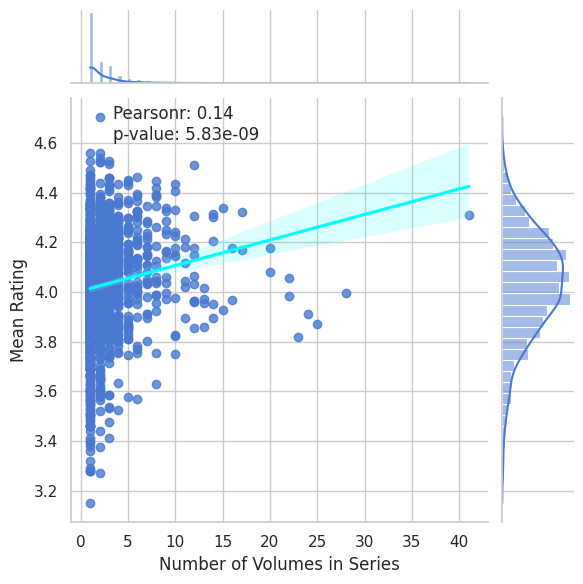

In [129]:
from scipy import stats

# Group the data by 'title' and calculate count and mean
series_stats = series.groupby('title').agg({'title': 'count', 'average_rating': 'mean'})

# Create a joint plot
jp = sns.jointplot(x=series_stats['title'], y=series_stats['average_rating'], kind='reg', line_kws={'color':'cyan'})

# Calculate Pearson correlation coefficient and p-value
pearsonr_coef, p_value = stats.pearsonr(series_stats['title'], series_stats['average_rating'])

# Annotate the joint plot with Pearson correlation coefficient and p-value
jp.ax_joint.annotate(f"Pearsonr: {pearsonr_coef:.2f}\np-value: {p_value:.2e}", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Number of Volumes in Series')
plt.ylabel('Mean Rating')

# Show the plot
plt.show()


In [130]:
#How long should a title be?
title_length = books[['title', 'average_rating']]
title_length['length'] = title_length['title'].str.findall('\s').apply(lambda x: len(x)+1)
title_length.head()


,title,average_rating,length
0,"The Hunger Games (The Hunger Games, #1)",4.34,7
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,9
2,"Twilight (Twilight, #1)",3.57,3
3,To Kill a Mockingbird,4.25,4
4,The Great Gatsby,3.89,3


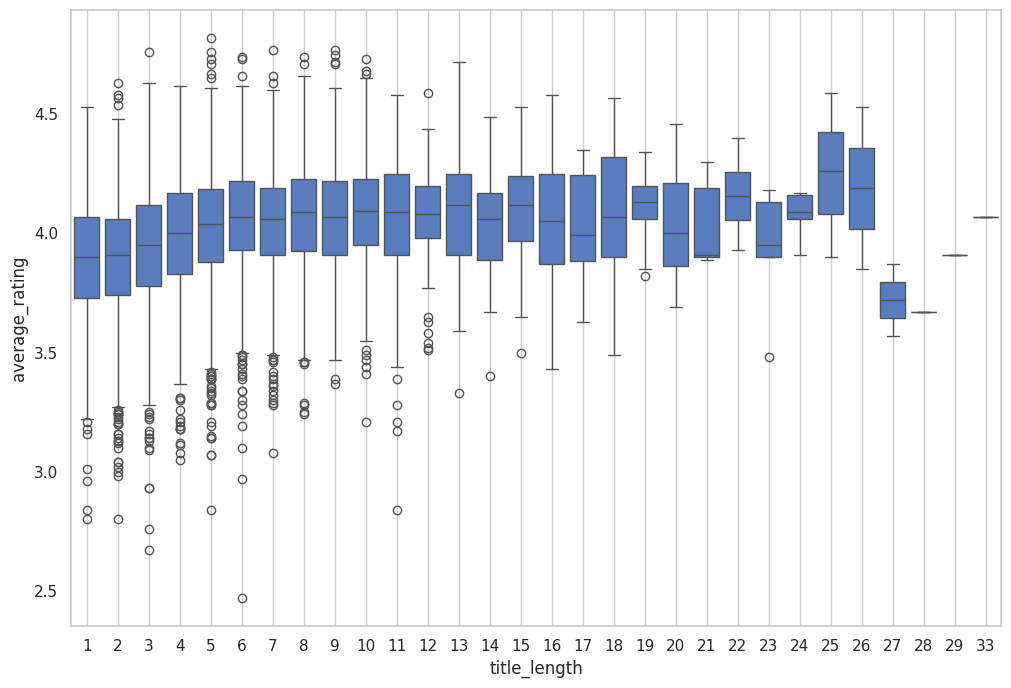

In [131]:
plt.figure(figsize=(12,8))
sns.boxplot(x='length', y='average_rating', data=title_length);
plt.xlabel('title_length');
plt.grid()

In [132]:
#Does having a subtitle improve the book’s rating?
has_subtitle = books[['title', 'average_rating']]
has_subtitle['has_subtitle'] = title_length['title'].str.contains(':', regex=False)
has_subtitle.head()

,title,average_rating,has_subtitle
0,"The Hunger Games (The Hunger Games, #1)",4.34,False
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,False
2,"Twilight (Twilight, #1)",3.57,False
3,To Kill a Mockingbird,4.25,False
4,The Great Gatsby,3.89,False


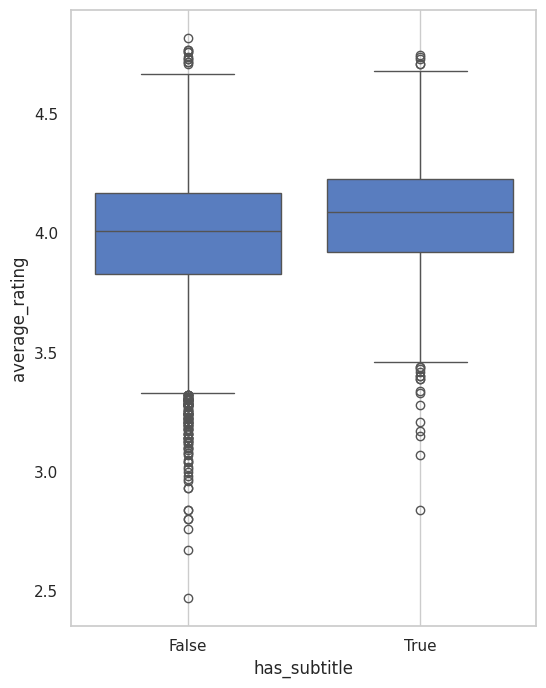

In [133]:
plt.figure(figsize=(6,8))
sns.boxplot(x='has_subtitle', y='average_rating', data=has_subtitle);
plt.grid()

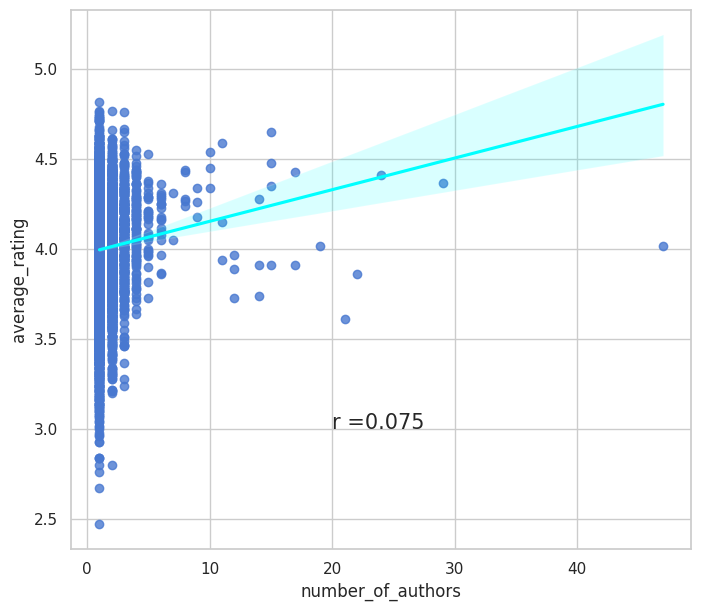

In [134]:
#Does the number of authors matter?
n_of_authors = books.authors.apply(lambda x: len(x.split(',')))

plt.figure(figsize=(8,7))
jp = sns.regplot(x=n_of_authors, y=books['average_rating'], line_kws={'color':'cyan'})
jp.annotate('r =' + str(round(stats.pearsonr(n_of_authors,books['average_rating'])[0], 3)),
            xy=(20,3), fontsize=15);
plt.xlabel('number_of_authors');